In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_19 = pd.read_csv('data_for_wr2019.csv')
df_19

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,0,1,11/02/2019 12:12:20 AM,11/02/2019 12:31:54 AM,1,6.60,1,N,164,33,1,21.5,3.0,0.5,5.05,0.0,0.3,30.35,2.5
1,1,1,11/02/2019 12:42:19 AM,11/02/2019 12:45:38 AM,1,0.60,1,N,148,148,1,4.5,3.0,0.5,1.65,0.0,0.3,9.95,2.5
2,2,1,11/02/2019 12:56:01 AM,11/02/2019 01:04:13 AM,2,1.80,1,N,4,170,1,8.0,3.0,0.5,2.35,0.0,0.3,14.15,2.5
3,3,1,11/02/2019 12:15:25 AM,11/02/2019 12:25:33 AM,2,2.00,1,N,113,113,1,9.0,0.5,0.5,2.05,0.0,0.3,12.35,0.0
4,4,1,11/02/2019 12:27:17 AM,11/02/2019 12:33:13 AM,4,1.00,1,N,113,113,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,3999995,1,11/19/2019 05:33:08 AM,11/19/2019 05:47:10 AM,1,4.40,1,N,193,107,2,14.5,3.0,0.5,0.00,0.0,0.3,18.30,2.5
3999996,3999996,1,11/19/2019 05:50:56 AM,11/19/2019 05:57:27 AM,1,1.70,1,N,137,148,1,7.5,3.0,0.5,2.25,0.0,0.3,13.55,2.5
3999997,3999997,1,11/19/2019 05:54:04 AM,11/19/2019 06:02:03 AM,1,2.40,1,N,143,161,1,9.0,3.0,0.5,2.55,0.0,0.3,15.35,2.5
3999998,3999998,2,11/19/2019 05:14:12 AM,11/19/2019 05:29:18 AM,1,6.36,1,N,224,25,2,20.0,0.5,0.5,0.00,0.0,0.3,23.80,2.5


In [3]:
df_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        int64  
 5   trip_distance          float64
 6   RatecodeID             int64  
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
dtypes: float64(9), int64(7), object(3)
memory usage: 579.8+ MB


In [4]:
df_19.duplicated().sum()

0

In [5]:
df_19['tpep_pickup_datetime'] = pd.to_datetime(df_19['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df_19['tpep_dropoff_datetime'] = pd.to_datetime(df_19['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df_19

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,0,1,2019-11-02 00:12:20,2019-11-02 00:31:54,1,6.60,1,N,164,33,1,21.5,3.0,0.5,5.05,0.0,0.3,30.35,2.5
1,1,1,2019-11-02 00:42:19,2019-11-02 00:45:38,1,0.60,1,N,148,148,1,4.5,3.0,0.5,1.65,0.0,0.3,9.95,2.5
2,2,1,2019-11-02 00:56:01,2019-11-02 01:04:13,2,1.80,1,N,4,170,1,8.0,3.0,0.5,2.35,0.0,0.3,14.15,2.5
3,3,1,2019-11-02 00:15:25,2019-11-02 00:25:33,2,2.00,1,N,113,113,1,9.0,0.5,0.5,2.05,0.0,0.3,12.35,0.0
4,4,1,2019-11-02 00:27:17,2019-11-02 00:33:13,4,1.00,1,N,113,113,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,3999995,1,2019-11-19 05:33:08,2019-11-19 05:47:10,1,4.40,1,N,193,107,2,14.5,3.0,0.5,0.00,0.0,0.3,18.30,2.5
3999996,3999996,1,2019-11-19 05:50:56,2019-11-19 05:57:27,1,1.70,1,N,137,148,1,7.5,3.0,0.5,2.25,0.0,0.3,13.55,2.5
3999997,3999997,1,2019-11-19 05:54:04,2019-11-19 06:02:03,1,2.40,1,N,143,161,1,9.0,3.0,0.5,2.55,0.0,0.3,15.35,2.5
3999998,3999998,2,2019-11-19 05:14:12,2019-11-19 05:29:18,1,6.36,1,N,224,25,2,20.0,0.5,0.5,0.00,0.0,0.3,23.80,2.5


In [6]:
df_20 = pd.read_csv('data_for_wr2020.csv')
df_20

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.20,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.20,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.60,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.80,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.00,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,3999995,2.0,01/21/2020 10:29:41 AM,01/21/2020 10:44:02 AM,1.0,1.81,1.0,N,238,236,2.0,10.5,0.0,0.5,0.00,0.0,0.3,13.80,2.5
3999996,3999996,2.0,01/21/2020 10:09:02 AM,01/21/2020 10:35:14 AM,1.0,5.30,1.0,N,13,163,1.0,21.5,0.0,0.5,4.96,0.0,0.3,29.76,2.5
3999997,3999997,2.0,01/21/2020 10:40:37 AM,01/21/2020 10:49:40 AM,1.0,1.42,1.0,N,163,237,1.0,7.5,0.0,0.5,1.62,0.0,0.3,12.42,2.5
3999998,3999998,1.0,01/21/2020 10:23:50 AM,01/21/2020 10:27:02 AM,1.0,0.60,1.0,N,263,141,1.0,4.0,2.5,0.5,1.00,0.0,0.3,8.30,2.5


In [7]:
df_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               float64
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           float64
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
dtypes: float64(13), int64(3), object(3)
memory usage: 579.8+ MB


In [8]:
df_20.duplicated().sum()

0

In [9]:
df_20['tpep_pickup_datetime'] = pd.to_datetime(df_20['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df_20['tpep_dropoff_datetime'] = pd.to_datetime(df_20['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df_20

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,3999995,2.0,2020-01-21 10:29:41,2020-01-21 10:44:02,1.0,1.81,1.0,N,238,236,2.0,10.5,0.0,0.5,0.00,0.0,0.3,13.80,2.5
3999996,3999996,2.0,2020-01-21 10:09:02,2020-01-21 10:35:14,1.0,5.30,1.0,N,13,163,1.0,21.5,0.0,0.5,4.96,0.0,0.3,29.76,2.5
3999997,3999997,2.0,2020-01-21 10:40:37,2020-01-21 10:49:40,1.0,1.42,1.0,N,163,237,1.0,7.5,0.0,0.5,1.62,0.0,0.3,12.42,2.5
3999998,3999998,1.0,2020-01-21 10:23:50,2020-01-21 10:27:02,1.0,0.60,1.0,N,263,141,1.0,4.0,2.5,0.5,1.00,0.0,0.3,8.30,2.5


In [10]:
df_21 = pd.read_csv('data_for_wr2021.csv')
df_21

/tmp/ipykernel_26135/1268771394.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_21 = pd.read_csv('data_for_wr2021.csv')


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,0,1.0,01/01/2021 12:30:10 AM,01/01/2021 12:36:12 AM,1.0,2.10,1.0,N,142,43,2.0,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5
1,1,1.0,01/01/2021 12:51:20 AM,01/01/2021 12:52:19 AM,1.0,0.20,1.0,N,238,151,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
2,2,1.0,01/01/2021 12:43:30 AM,01/01/2021 01:11:06 AM,1.0,14.70,1.0,N,132,165,1.0,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0
3,3,1.0,01/01/2021 12:15:48 AM,01/01/2021 12:31:01 AM,0.0,10.60,1.0,N,138,132,1.0,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0
4,4,2.0,01/01/2021 12:31:49 AM,01/01/2021 12:48:21 AM,1.0,4.94,1.0,N,68,33,1.0,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,3999995,2.0,03/22/2021 11:29:29 PM,03/23/2021 12:00:32 AM,2.0,14.05,1.0,N,248,166,1.0,41.0,0.5,0.5,0.00,2.8,0.3,45.10,0.0
3999996,3999996,2.0,03/22/2021 11:43:42 PM,03/22/2021 11:46:18 PM,2.0,0.03,1.0,N,148,148,2.0,3.5,0.5,0.5,0.00,0.0,0.3,7.30,2.5
3999997,3999997,2.0,03/22/2021 11:16:27 PM,03/22/2021 11:23:41 PM,1.0,1.46,1.0,N,41,75,1.0,7.5,0.5,0.5,2.00,0.0,0.3,10.80,0.0
3999998,3999998,2.0,03/22/2021 11:33:23 PM,03/22/2021 11:46:24 PM,1.0,3.13,1.0,N,236,186,1.0,13.0,0.5,0.5,3.36,0.0,0.3,20.16,2.5


In [11]:
df_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               float64
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           float64
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
dtypes: float64(13), int64(3), object(3)
memory usage: 579.8+ MB


In [12]:
df_21.duplicated().sum()

0

In [13]:
df_21['tpep_pickup_datetime'] = pd.to_datetime(df_21['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df_21['tpep_dropoff_datetime'] = pd.to_datetime(df_21['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df_21

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2.0,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5
1,1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
2,2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1.0,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0
3,3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1.0,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0
4,4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1.0,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,3999995,2.0,2021-03-22 23:29:29,2021-03-23 00:00:32,2.0,14.05,1.0,N,248,166,1.0,41.0,0.5,0.5,0.00,2.8,0.3,45.10,0.0
3999996,3999996,2.0,2021-03-22 23:43:42,2021-03-22 23:46:18,2.0,0.03,1.0,N,148,148,2.0,3.5,0.5,0.5,0.00,0.0,0.3,7.30,2.5
3999997,3999997,2.0,2021-03-22 23:16:27,2021-03-22 23:23:41,1.0,1.46,1.0,N,41,75,1.0,7.5,0.5,0.5,2.00,0.0,0.3,10.80,0.0
3999998,3999998,2.0,2021-03-22 23:33:23,2021-03-22 23:46:24,1.0,3.13,1.0,N,236,186,1.0,13.0,0.5,0.5,3.36,0.0,0.3,20.16,2.5


In [14]:
df = pd.concat([
    df_19,
    df_20,
    df_21
])
df

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,0,1.0,2019-11-02 00:12:20,2019-11-02 00:31:54,1.0,6.60,1.0,N,164,33,1.0,21.5,3.0,0.5,5.05,0.0,0.3,30.35,2.5
1,1,1.0,2019-11-02 00:42:19,2019-11-02 00:45:38,1.0,0.60,1.0,N,148,148,1.0,4.5,3.0,0.5,1.65,0.0,0.3,9.95,2.5
2,2,1.0,2019-11-02 00:56:01,2019-11-02 01:04:13,2.0,1.80,1.0,N,4,170,1.0,8.0,3.0,0.5,2.35,0.0,0.3,14.15,2.5
3,3,1.0,2019-11-02 00:15:25,2019-11-02 00:25:33,2.0,2.00,1.0,N,113,113,1.0,9.0,0.5,0.5,2.05,0.0,0.3,12.35,0.0
4,4,1.0,2019-11-02 00:27:17,2019-11-02 00:33:13,4.0,1.00,1.0,N,113,113,2.0,6.0,0.5,0.5,0.00,0.0,0.3,7.30,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,3999995,2.0,2021-03-22 23:29:29,2021-03-23 00:00:32,2.0,14.05,1.0,N,248,166,1.0,41.0,0.5,0.5,0.00,2.8,0.3,45.10,0.0
3999996,3999996,2.0,2021-03-22 23:43:42,2021-03-22 23:46:18,2.0,0.03,1.0,N,148,148,2.0,3.5,0.5,0.5,0.00,0.0,0.3,7.30,2.5
3999997,3999997,2.0,2021-03-22 23:16:27,2021-03-22 23:23:41,1.0,1.46,1.0,N,41,75,1.0,7.5,0.5,0.5,2.00,0.0,0.3,10.80,0.0
3999998,3999998,2.0,2021-03-22 23:33:23,2021-03-22 23:46:24,1.0,3.13,1.0,N,236,186,1.0,13.0,0.5,0.5,3.36,0.0,0.3,20.16,2.5


In [15]:
df['year'] = df['tpep_pickup_datetime'].dt.year
df['month'] = df['tpep_pickup_datetime'].dt.month
df

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,year,month
0,0,1.0,2019-11-02 00:12:20,2019-11-02 00:31:54,1.0,6.60,1.0,N,164,33,...,21.5,3.0,0.5,5.05,0.0,0.3,30.35,2.5,2019,11
1,1,1.0,2019-11-02 00:42:19,2019-11-02 00:45:38,1.0,0.60,1.0,N,148,148,...,4.5,3.0,0.5,1.65,0.0,0.3,9.95,2.5,2019,11
2,2,1.0,2019-11-02 00:56:01,2019-11-02 01:04:13,2.0,1.80,1.0,N,4,170,...,8.0,3.0,0.5,2.35,0.0,0.3,14.15,2.5,2019,11
3,3,1.0,2019-11-02 00:15:25,2019-11-02 00:25:33,2.0,2.00,1.0,N,113,113,...,9.0,0.5,0.5,2.05,0.0,0.3,12.35,0.0,2019,11
4,4,1.0,2019-11-02 00:27:17,2019-11-02 00:33:13,4.0,1.00,1.0,N,113,113,...,6.0,0.5,0.5,0.00,0.0,0.3,7.30,0.0,2019,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,3999995,2.0,2021-03-22 23:29:29,2021-03-23 00:00:32,2.0,14.05,1.0,N,248,166,...,41.0,0.5,0.5,0.00,2.8,0.3,45.10,0.0,2021,3
3999996,3999996,2.0,2021-03-22 23:43:42,2021-03-22 23:46:18,2.0,0.03,1.0,N,148,148,...,3.5,0.5,0.5,0.00,0.0,0.3,7.30,2.5,2021,3
3999997,3999997,2.0,2021-03-22 23:16:27,2021-03-22 23:23:41,1.0,1.46,1.0,N,41,75,...,7.5,0.5,0.5,2.00,0.0,0.3,10.80,0.0,2021,3
3999998,3999998,2.0,2021-03-22 23:33:23,2021-03-22 23:46:24,1.0,3.13,1.0,N,236,186,...,13.0,0.5,0.5,3.36,0.0,0.3,20.16,2.5,2021,3


In [16]:
df['year'].unique()

array([2019, 2009, 2008, 2020, 2003, 2015, 2021], dtype=int32)

In [17]:
df = df.loc[df['year'].isin([2019, 2020, 2021])]
df

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,year,month
0,0,1.0,2019-11-02 00:12:20,2019-11-02 00:31:54,1.0,6.60,1.0,N,164,33,...,21.5,3.0,0.5,5.05,0.0,0.3,30.35,2.5,2019,11
1,1,1.0,2019-11-02 00:42:19,2019-11-02 00:45:38,1.0,0.60,1.0,N,148,148,...,4.5,3.0,0.5,1.65,0.0,0.3,9.95,2.5,2019,11
2,2,1.0,2019-11-02 00:56:01,2019-11-02 01:04:13,2.0,1.80,1.0,N,4,170,...,8.0,3.0,0.5,2.35,0.0,0.3,14.15,2.5,2019,11
3,3,1.0,2019-11-02 00:15:25,2019-11-02 00:25:33,2.0,2.00,1.0,N,113,113,...,9.0,0.5,0.5,2.05,0.0,0.3,12.35,0.0,2019,11
4,4,1.0,2019-11-02 00:27:17,2019-11-02 00:33:13,4.0,1.00,1.0,N,113,113,...,6.0,0.5,0.5,0.00,0.0,0.3,7.30,0.0,2019,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,3999995,2.0,2021-03-22 23:29:29,2021-03-23 00:00:32,2.0,14.05,1.0,N,248,166,...,41.0,0.5,0.5,0.00,2.8,0.3,45.10,0.0,2021,3
3999996,3999996,2.0,2021-03-22 23:43:42,2021-03-22 23:46:18,2.0,0.03,1.0,N,148,148,...,3.5,0.5,0.5,0.00,0.0,0.3,7.30,2.5,2021,3
3999997,3999997,2.0,2021-03-22 23:16:27,2021-03-22 23:23:41,1.0,1.46,1.0,N,41,75,...,7.5,0.5,0.5,2.00,0.0,0.3,10.80,0.0,2021,3
3999998,3999998,2.0,2021-03-22 23:33:23,2021-03-22 23:46:24,1.0,3.13,1.0,N,236,186,...,13.0,0.5,0.5,3.36,0.0,0.3,20.16,2.5,2021,3


In [18]:
df['month'].unique()

array([11, 10, 12,  1,  2,  3,  4,  5,  6,  7], dtype=int32)

In [19]:
# Пример пропорциональной выборки: сохраняем 50% от каждого месяца
balanced_df = (
    df.groupby('month', group_keys=False)
    .apply(lambda x: x.sample(frac=0.5, random_state=42))
)
balanced_df

/tmp/ipykernel_26135/3549149002.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=0.5, random_state=42))


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,year,month
1403068,1403068,1.0,2020-01-08 20:50:10,2020-01-08 20:57:02,1.0,2.30,1.0,N,263,74,...,8.5,3.0,0.5,1.85,0.0,0.3,14.15,2.5,2020,1
888333,888333,1.0,2020-01-06 08:11:50,2020-01-06 08:20:13,1.0,1.30,1.0,N,140,162,...,7.5,2.5,0.5,2.15,0.0,0.3,12.95,2.5,2020,1
451187,451187,1.0,2021-01-12 19:59:09,2021-01-12 20:03:51,0.0,1.20,1.0,N,163,141,...,6.0,3.0,0.5,1.95,0.0,0.3,11.75,2.5,2021,1
2829057,2829057,2.0,2020-01-15 15:44:10,2020-01-15 15:53:27,2.0,1.04,1.0,N,237,161,...,7.5,0.0,0.5,1.00,0.0,0.3,11.80,2.5,2020,1
3834948,3834948,1.0,2020-01-20 12:30:19,2020-01-20 12:40:22,2.0,1.80,1.0,Y,236,161,...,9.0,2.5,0.5,0.00,0.0,0.3,12.30,2.5,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476,3476,2.0,2020-12-31 23:06:12,2020-12-31 23:18:39,1.0,7.08,1.0,N,42,137,...,21.0,0.5,0.5,0.00,0.0,0.3,24.80,2.5,2020,12
3011096,3011096,2.0,2019-12-26 20:57:46,2019-12-26 21:14:03,1.0,2.83,1.0,N,234,237,...,13.0,0.5,0.5,3.36,0.0,0.3,20.16,2.5,2019,12
2320356,2320356,2.0,2019-12-03 00:10:00,2019-12-03 00:20:44,1.0,1.42,1.0,N,140,233,...,8.0,0.0,0.5,2.26,0.0,0.3,13.56,2.5,2019,12
637,637,2.0,2020-12-31 18:41:27,2021-01-01 17:52:03,1.0,2.61,1.0,N,90,229,...,10.0,0.5,0.5,2.76,0.0,0.3,16.56,2.5,2020,12


In [20]:
balanced_df['month'].value_counts()

month
1     2680414
11    1999902
2      685852
3      629254
7        4393
12        111
10         24
5           6
4           4
6           2
Name: count, dtype: int64

In [21]:
balanced_df.isnull().sum()

Unnamed: 0                    0
VendorID                 102728
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          102728
trip_distance                 0
RatecodeID               102728
store_and_fwd_flag       102728
PULocationID                  0
DOLocationID                  0
payment_type             102728
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge          2
year                          0
month                         0
dtype: int64

In [22]:
balanced_df.dropna(inplace=True)
balanced_df

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,year,month
1403068,1403068,1.0,2020-01-08 20:50:10,2020-01-08 20:57:02,1.0,2.30,1.0,N,263,74,...,8.5,3.0,0.5,1.85,0.0,0.3,14.15,2.5,2020,1
888333,888333,1.0,2020-01-06 08:11:50,2020-01-06 08:20:13,1.0,1.30,1.0,N,140,162,...,7.5,2.5,0.5,2.15,0.0,0.3,12.95,2.5,2020,1
451187,451187,1.0,2021-01-12 19:59:09,2021-01-12 20:03:51,0.0,1.20,1.0,N,163,141,...,6.0,3.0,0.5,1.95,0.0,0.3,11.75,2.5,2021,1
2829057,2829057,2.0,2020-01-15 15:44:10,2020-01-15 15:53:27,2.0,1.04,1.0,N,237,161,...,7.5,0.0,0.5,1.00,0.0,0.3,11.80,2.5,2020,1
3834948,3834948,1.0,2020-01-20 12:30:19,2020-01-20 12:40:22,2.0,1.80,1.0,Y,236,161,...,9.0,2.5,0.5,0.00,0.0,0.3,12.30,2.5,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476,3476,2.0,2020-12-31 23:06:12,2020-12-31 23:18:39,1.0,7.08,1.0,N,42,137,...,21.0,0.5,0.5,0.00,0.0,0.3,24.80,2.5,2020,12
3011096,3011096,2.0,2019-12-26 20:57:46,2019-12-26 21:14:03,1.0,2.83,1.0,N,234,237,...,13.0,0.5,0.5,3.36,0.0,0.3,20.16,2.5,2019,12
2320356,2320356,2.0,2019-12-03 00:10:00,2019-12-03 00:20:44,1.0,1.42,1.0,N,140,233,...,8.0,0.0,0.5,2.26,0.0,0.3,13.56,2.5,2019,12
637,637,2.0,2020-12-31 18:41:27,2021-01-01 17:52:03,1.0,2.61,1.0,N,90,229,...,10.0,0.5,0.5,2.76,0.0,0.3,16.56,2.5,2020,12


In [23]:
num_col = balanced_df.select_dtypes(include='number').columns

def remove_outliers(frame, column):
    Q1 = frame[column].quantile(0.25)
    Q3 = frame[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
        
    return frame[(frame[column] >= lower_bound) & (frame[column] <= upper_bound)]

for col in num_col:
    balanced_df = remove_outliers(balanced_df, col)

balanced_df

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,year,month
1403068,1403068,1.0,2020-01-08 20:50:10,2020-01-08 20:57:02,1.0,2.30,1.0,N,263,74,...,8.5,3.0,0.5,1.85,0.0,0.3,14.15,2.5,2020,1
888333,888333,1.0,2020-01-06 08:11:50,2020-01-06 08:20:13,1.0,1.30,1.0,N,140,162,...,7.5,2.5,0.5,2.15,0.0,0.3,12.95,2.5,2020,1
451187,451187,1.0,2021-01-12 19:59:09,2021-01-12 20:03:51,0.0,1.20,1.0,N,163,141,...,6.0,3.0,0.5,1.95,0.0,0.3,11.75,2.5,2021,1
2829057,2829057,2.0,2020-01-15 15:44:10,2020-01-15 15:53:27,2.0,1.04,1.0,N,237,161,...,7.5,0.0,0.5,1.00,0.0,0.3,11.80,2.5,2020,1
3834948,3834948,1.0,2020-01-20 12:30:19,2020-01-20 12:40:22,2.0,1.80,1.0,Y,236,161,...,9.0,2.5,0.5,0.00,0.0,0.3,12.30,2.5,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33746,33746,2.0,2019-12-31 23:27:57,2019-12-31 23:30:02,2.0,0.28,1.0,N,68,246,...,3.5,0.5,0.5,0.00,0.0,0.3,7.30,2.5,2019,12
2194,2194,2.0,2019-12-31 16:18:17,2020-01-01 15:37:27,1.0,1.22,1.0,N,142,48,...,12.5,0.5,0.5,0.00,0.0,0.3,16.30,2.5,2019,12
3011096,3011096,2.0,2019-12-26 20:57:46,2019-12-26 21:14:03,1.0,2.83,1.0,N,234,237,...,13.0,0.5,0.5,3.36,0.0,0.3,20.16,2.5,2019,12
2320356,2320356,2.0,2019-12-03 00:10:00,2019-12-03 00:20:44,1.0,1.42,1.0,N,140,233,...,8.0,0.0,0.5,2.26,0.0,0.3,13.56,2.5,2019,12


In [24]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
balanced_df['store_and_fwd_flag'] = encoder.fit_transform(balanced_df[['store_and_fwd_flag']])
balanced_df

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,year,month
1403068,1403068,1.0,2020-01-08 20:50:10,2020-01-08 20:57:02,1.0,2.30,1.0,0.0,263,74,...,8.5,3.0,0.5,1.85,0.0,0.3,14.15,2.5,2020,1
888333,888333,1.0,2020-01-06 08:11:50,2020-01-06 08:20:13,1.0,1.30,1.0,0.0,140,162,...,7.5,2.5,0.5,2.15,0.0,0.3,12.95,2.5,2020,1
451187,451187,1.0,2021-01-12 19:59:09,2021-01-12 20:03:51,0.0,1.20,1.0,0.0,163,141,...,6.0,3.0,0.5,1.95,0.0,0.3,11.75,2.5,2021,1
2829057,2829057,2.0,2020-01-15 15:44:10,2020-01-15 15:53:27,2.0,1.04,1.0,0.0,237,161,...,7.5,0.0,0.5,1.00,0.0,0.3,11.80,2.5,2020,1
3834948,3834948,1.0,2020-01-20 12:30:19,2020-01-20 12:40:22,2.0,1.80,1.0,1.0,236,161,...,9.0,2.5,0.5,0.00,0.0,0.3,12.30,2.5,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33746,33746,2.0,2019-12-31 23:27:57,2019-12-31 23:30:02,2.0,0.28,1.0,0.0,68,246,...,3.5,0.5,0.5,0.00,0.0,0.3,7.30,2.5,2019,12
2194,2194,2.0,2019-12-31 16:18:17,2020-01-01 15:37:27,1.0,1.22,1.0,0.0,142,48,...,12.5,0.5,0.5,0.00,0.0,0.3,16.30,2.5,2019,12
3011096,3011096,2.0,2019-12-26 20:57:46,2019-12-26 21:14:03,1.0,2.83,1.0,0.0,234,237,...,13.0,0.5,0.5,3.36,0.0,0.3,20.16,2.5,2019,12
2320356,2320356,2.0,2019-12-03 00:10:00,2019-12-03 00:20:44,1.0,1.42,1.0,0.0,140,233,...,8.0,0.0,0.5,2.26,0.0,0.3,13.56,2.5,2019,12


In [25]:
balanced_df['day'] = balanced_df['tpep_pickup_datetime'].dt.day
balanced_df['trip_time']  = (balanced_df['tpep_dropoff_datetime'] - balanced_df['tpep_pickup_datetime']).dt.total_seconds() / 60
balanced_df.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime'], inplace=True)
balanced_df

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,year,month,day,trip_time
1403068,1403068,1.0,1.0,2.30,1.0,0.0,263,74,1.0,8.5,...,0.5,1.85,0.0,0.3,14.15,2.5,2020,1,8,6.866667
888333,888333,1.0,1.0,1.30,1.0,0.0,140,162,1.0,7.5,...,0.5,2.15,0.0,0.3,12.95,2.5,2020,1,6,8.383333
451187,451187,1.0,0.0,1.20,1.0,0.0,163,141,1.0,6.0,...,0.5,1.95,0.0,0.3,11.75,2.5,2021,1,12,4.700000
2829057,2829057,2.0,2.0,1.04,1.0,0.0,237,161,1.0,7.5,...,0.5,1.00,0.0,0.3,11.80,2.5,2020,1,15,9.283333
3834948,3834948,1.0,2.0,1.80,1.0,1.0,236,161,2.0,9.0,...,0.5,0.00,0.0,0.3,12.30,2.5,2020,1,20,10.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33746,33746,2.0,2.0,0.28,1.0,0.0,68,246,1.0,3.5,...,0.5,0.00,0.0,0.3,7.30,2.5,2019,12,31,2.083333
2194,2194,2.0,1.0,1.22,1.0,0.0,142,48,2.0,12.5,...,0.5,0.00,0.0,0.3,16.30,2.5,2019,12,31,1399.166667
3011096,3011096,2.0,1.0,2.83,1.0,0.0,234,237,1.0,13.0,...,0.5,3.36,0.0,0.3,20.16,2.5,2019,12,26,16.283333
2320356,2320356,2.0,1.0,1.42,1.0,0.0,140,233,1.0,8.0,...,0.5,2.26,0.0,0.3,13.56,2.5,2019,12,3,10.733333


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

groups = balanced_df.groupby('year')
scaled_groups = {}

for name, group in groups:
    scaled_data = scaler.fit_transform(group)
    scaled_groups[name] = pd.DataFrame(scaled_data, columns=group.columns)

scaled_groups[2020]


,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,year,month,day,trip_time
0,-0.531310,-1.356790,-0.424523,0.624147,0.0,-0.106798,1.438136,-1.387900,-0.579313,-0.064043,...,0.0,0.145795,0.0,8.326673e-16,0.036636,0.0,0.0,-0.002358,-0.532820,-0.095687
1,-0.980399,-1.356790,-0.424523,-0.353287,0.0,-0.106798,-0.442223,-0.081881,-0.579313,-0.347259,...,0.0,0.381343,0.0,8.326673e-16,-0.252366,0.0,0.0,-0.002358,-0.890357,-0.069872
2,0.712816,0.737034,1.375827,-0.607420,0.0,-0.106798,1.040662,-0.096722,-0.579313,-0.347259,...,0.0,-0.521589,0.0,8.326673e-16,-0.529326,0.0,0.0,-0.002358,0.718561,-0.054552
3,1.590421,-1.356790,1.375827,0.135430,0.0,9.363428,1.025375,-0.096722,1.667214,0.077565,...,0.0,-1.306747,0.0,8.326673e-16,-0.408909,0.0,0.0,-0.002358,1.612404,-0.041503
4,-0.282504,-1.356790,-0.424523,-0.548774,0.0,-0.106798,-0.488085,-0.081881,-0.579313,-0.913691,...,0.0,-0.521589,0.0,8.326673e-16,-0.890579,0.0,0.0,-0.002358,-0.175282,-0.144198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470295,-1.753798,0.737034,-0.424523,-0.089380,0.0,-0.106798,-0.488085,-1.313694,-0.579313,-0.347259,...,0.0,0.907399,0.0,8.326673e-16,0.029411,0.0,0.0,529.724804,3.578859,-0.104198
1470296,-1.754622,0.737034,-0.424523,2.051200,0.0,-0.106798,0.016402,0.867951,-0.579313,1.068821,...,0.0,1.896698,0.0,8.326673e-16,1.537038,0.0,0.0,529.724804,3.578859,-0.047744
1470297,-1.755041,0.737034,1.375827,-0.900650,0.0,-0.106798,1.040662,1.016362,-0.579313,-1.055299,...,0.0,0.075131,0.0,8.326673e-16,-0.827962,0.0,0.0,529.724804,3.578859,-0.148737
1470298,-1.752954,0.737034,-0.424523,0.868505,0.0,-0.106798,-1.848670,1.046044,1.667214,0.077565,...,0.0,-1.306747,0.0,8.326673e-16,-0.288491,0.0,0.0,529.724804,3.578859,23.396543


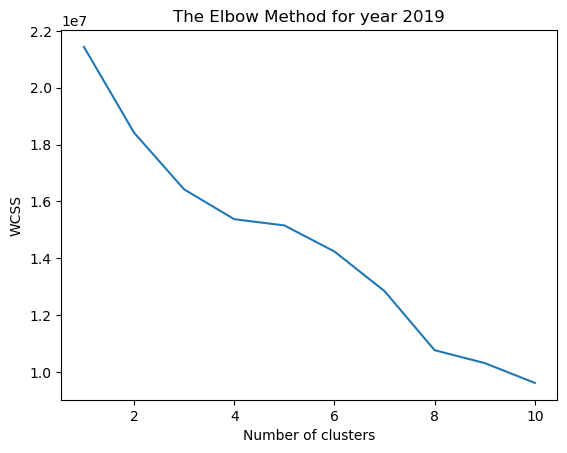

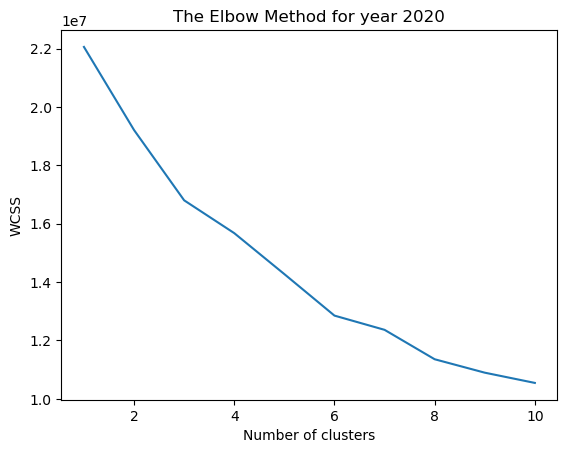

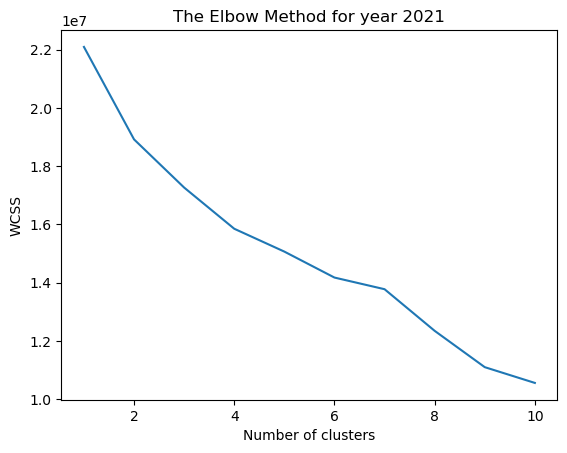

In [28]:
from sklearn.cluster import KMeans
for name, group in scaled_groups.items():
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
        kmeans.fit(group)
        wcss.append(kmeans.inertia_)



    plt.plot(range(1, 11), wcss)
    plt.title(f'The Elbow Method for year {name}')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

/home/user/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


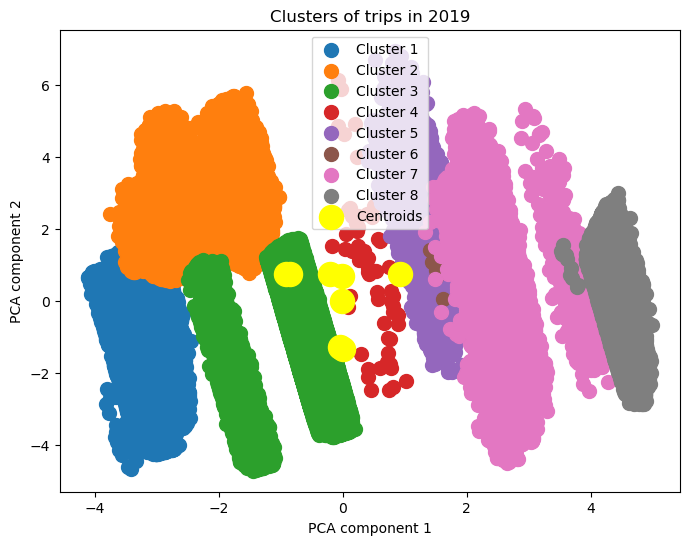

/home/user/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


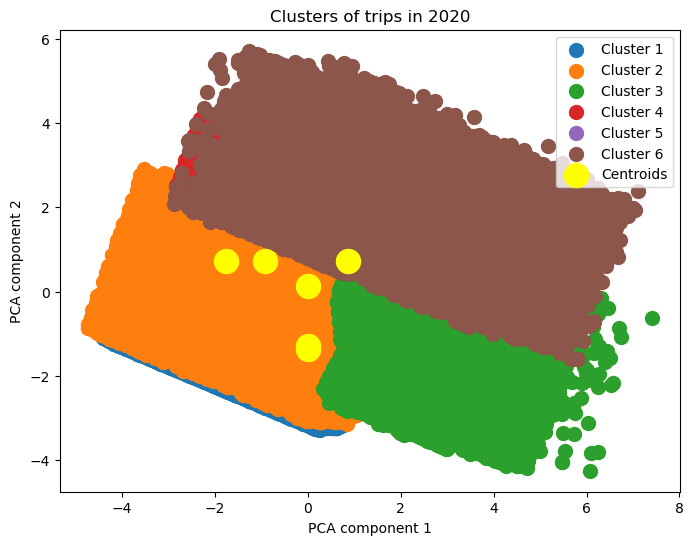

/home/user/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


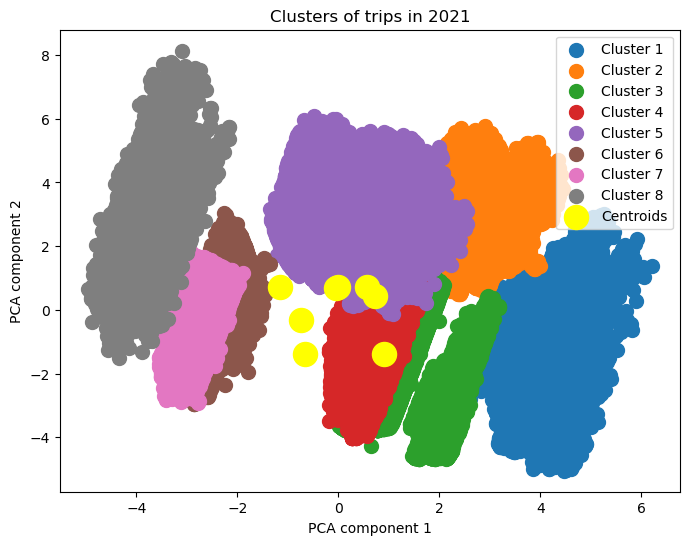

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

clusters_map = {2019: 8, 2020: 6, 2021: 8}

for name, group in scaled_groups.items():
    num_clusters = clusters_map[name] 
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(group)

    group['cluster'] = y_kmeans

    pca = PCA(n_components=2)
    X = pca.fit_transform(group)

    plt.figure(figsize=(8, 6))
    for i in range(num_clusters):
        plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=100, label=f'Cluster {i+1}')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

    plt.title(f'Clusters of trips in {name}')
    plt.xlabel('PCA component 1')
    plt.ylabel('PCA component 2')
    plt.legend()
    plt.show()
    plt.close()


In [30]:
data = pd.concat(scaled_groups.values(), axis=0))
data

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,year,month,day,trip_time,cluster
0,-1.512160,0.758325,1.367096,2.284823,0.0,-0.112462,-0.420496,-0.134959,-0.578218,1.027439,...,-0.079877,0.0,7.771561e-16,0.902730,0.0,0.0,-132.016195,0.188491,-0.032990,1
1,-1.482042,0.758325,1.367096,-0.689936,0.0,-0.112462,-1.839903,-1.737402,-0.578218,-0.868640,...,0.194257,0.0,7.771561e-16,-0.634777,0.0,0.0,-132.016195,0.188491,-0.119578,7
2,-1.615397,0.758325,-0.422351,1.086797,0.0,-0.112462,1.227848,0.963011,-0.578218,1.704610,...,1.564930,0.0,7.771561e-16,1.865986,0.0,0.0,-132.016195,-0.015859,0.128436,1
3,-1.479742,0.758325,1.367096,-1.187421,0.0,-0.112462,-0.115247,-0.090447,1.663985,-1.274942,...,-1.298253,0.0,7.771561e-16,-1.551723,0.0,0.0,-132.016195,0.188491,-0.150228,2
4,-1.627002,0.758325,-0.422351,-0.892991,0.0,-0.112462,0.998911,1.215247,1.663985,-0.462337,...,-1.298253,0.0,7.771561e-16,-0.857067,0.0,0.0,-132.016195,-0.015859,-0.067472,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473000,0.741807,0.716249,-0.362315,-0.665550,0.0,-0.123358,0.950662,-0.474352,1.756578,-0.308768,...,-1.337715,0.0,8.326673e-16,-0.753076,0.0,0.0,2.448356,-0.061112,-0.038482,2
1473001,0.753193,0.716249,-0.362315,1.123386,0.0,-0.123358,0.874053,0.932448,-0.543554,0.411843,...,0.868397,0.0,8.326673e-16,0.800946,0.0,0.0,3.673117,1.585212,-0.067645,1
1473002,0.749652,0.716249,-0.362315,0.482431,0.0,-0.123358,-1.899200,1.005719,1.756578,0.555965,...,-1.337715,0.0,8.326673e-16,0.224297,0.0,0.0,3.673117,1.585212,0.011779,2
1473003,0.749651,0.716249,-0.362315,-0.015028,0.0,-0.123358,-0.995211,0.243703,-0.543554,0.267721,...,0.259016,0.0,8.326673e-16,0.485744,0.0,0.0,3.673117,-1.200874,7.844043,1


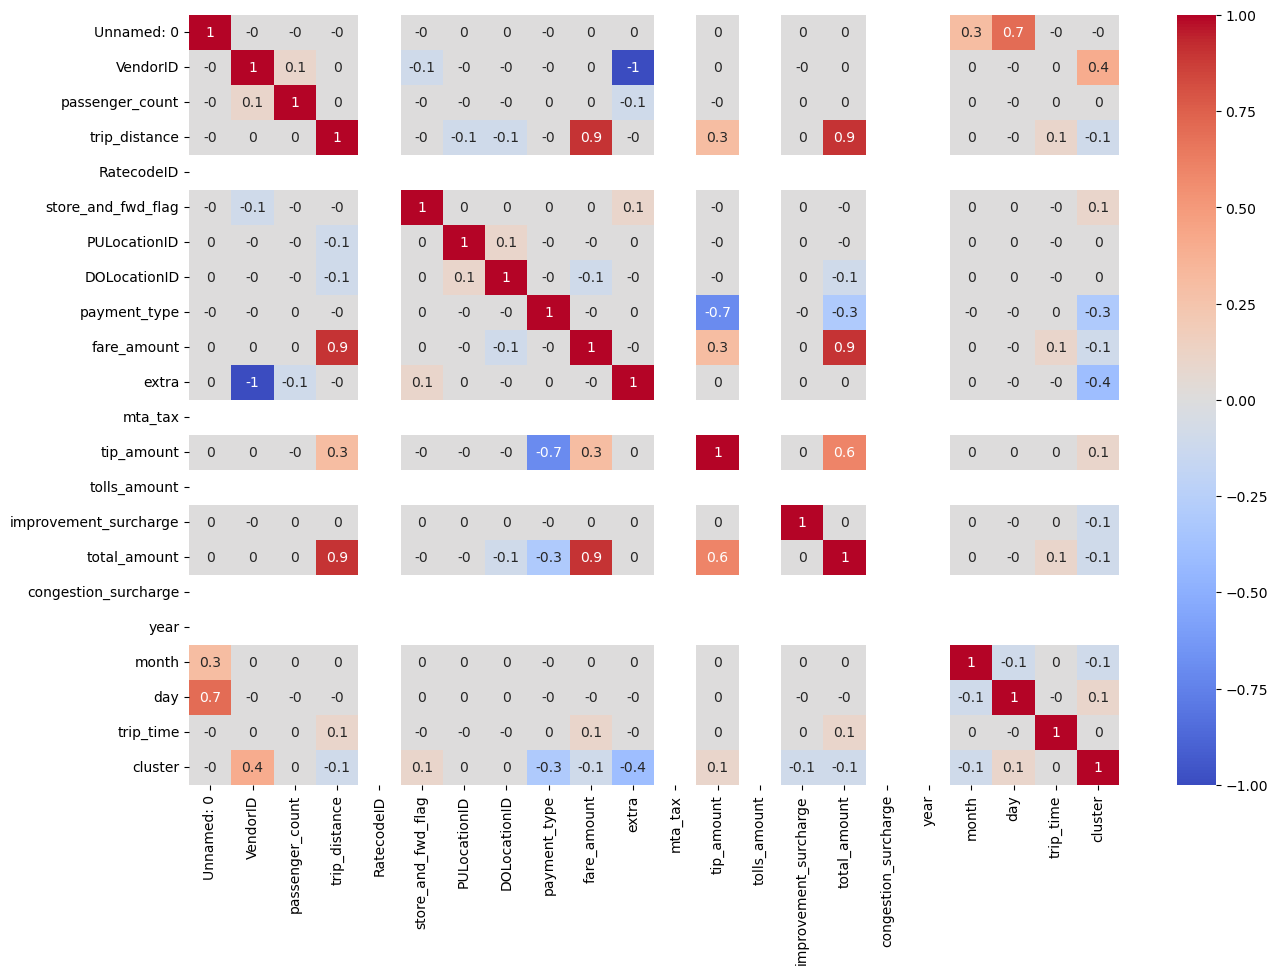

In [31]:
plt.figure(figsize=(15, 10))
correlation = round(data.corr(), 1)
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [33]:
need_columns = ['VendorID','trip_distance', 'store_and_fwd_flag', 'fare_amount', 'tip_amount', 'improvement_surcharge', 'total_amount', 'payment_type', 'extra', 'year', 'cluster']
df = data[need_columns]
df

,VendorID,trip_distance,store_and_fwd_flag,fare_amount,tip_amount,improvement_surcharge,total_amount,payment_type,extra,year,cluster
0,0.758325,2.284823,-0.112462,1.027439,-0.079877,7.771561e-16,0.902730,-0.578218,-0.557950,0.0,1
1,0.758325,-0.689936,-0.112462,-0.868640,0.194257,7.771561e-16,-0.634777,-0.578218,-0.557950,0.0,7
2,0.758325,1.086797,-0.112462,1.704610,1.564930,7.771561e-16,1.865986,-0.578218,-0.956526,0.0,1
3,0.758325,-1.187421,-0.112462,-1.274942,-1.298253,7.771561e-16,-1.551723,1.663985,-0.956526,0.0,2
4,0.758325,-0.892991,-0.112462,-0.462337,-1.298253,7.771561e-16,-0.857067,1.663985,-0.956526,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
1473000,0.716249,-0.665550,-0.123358,-0.308768,-1.337715,8.326673e-16,-0.753076,1.756578,-0.893188,0.0,2
1473001,0.716249,1.123386,-0.123358,0.411843,0.868397,8.326673e-16,0.800946,-0.543554,-0.098643,0.0,1
1473002,0.716249,0.482431,-0.123358,0.555965,-1.337715,8.326673e-16,0.224297,1.756578,-0.098643,0.0,2
1473003,0.716249,-0.015028,-0.123358,0.267721,0.259016,8.326673e-16,0.485744,-0.543554,-0.098643,0.0,1


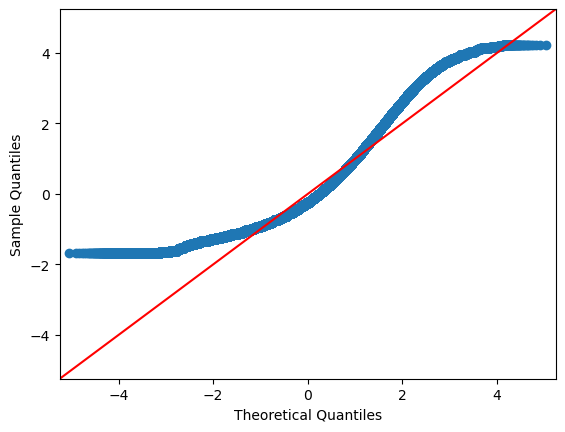

In [38]:
from statsmodels.graphics.gofplots import qqplot

qqplot(df['trip_distance'], fit=True,line="45")
plt.show()

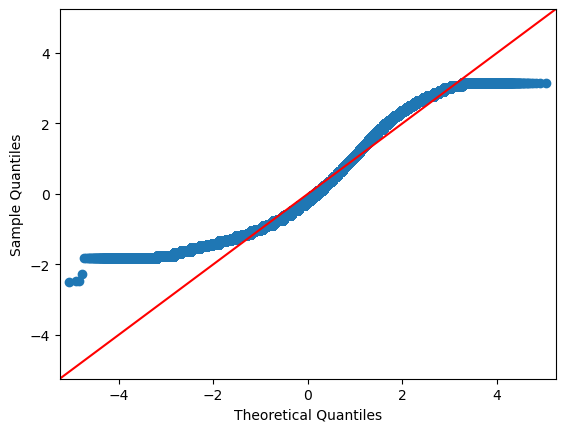

In [40]:
qqplot(df['fare_amount'], fit=True,line="45")
plt.show()

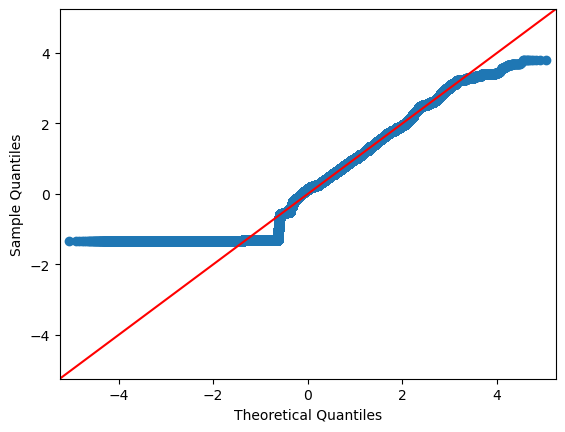

In [41]:
qqplot(df['tip_amount'], fit=True,line="45")
plt.show()

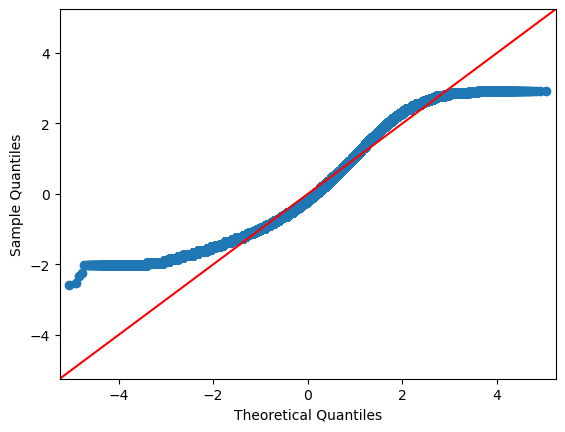

In [43]:
qqplot(df['total_amount'], fit=True,line="45")
plt.show()

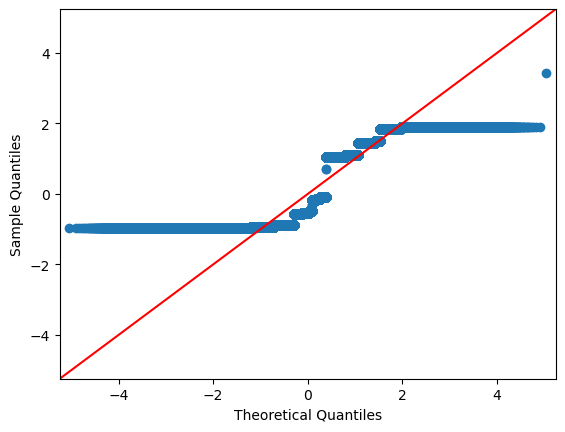

In [44]:
qqplot(df['extra'], fit=True,line="45")
plt.show()

VendorID
trip_distance
store_and_fwd_flag


In [46]:
balanced_df

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,year,month,day,trip_time
1403068,1403068,1.0,1.0,2.30,1.0,0.0,263,74,1.0,8.5,...,0.5,1.85,0.0,0.3,14.15,2.5,2020,1,8,6.866667
888333,888333,1.0,1.0,1.30,1.0,0.0,140,162,1.0,7.5,...,0.5,2.15,0.0,0.3,12.95,2.5,2020,1,6,8.383333
451187,451187,1.0,0.0,1.20,1.0,0.0,163,141,1.0,6.0,...,0.5,1.95,0.0,0.3,11.75,2.5,2021,1,12,4.700000
2829057,2829057,2.0,2.0,1.04,1.0,0.0,237,161,1.0,7.5,...,0.5,1.00,0.0,0.3,11.80,2.5,2020,1,15,9.283333
3834948,3834948,1.0,2.0,1.80,1.0,1.0,236,161,2.0,9.0,...,0.5,0.00,0.0,0.3,12.30,2.5,2020,1,20,10.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33746,33746,2.0,2.0,0.28,1.0,0.0,68,246,1.0,3.5,...,0.5,0.00,0.0,0.3,7.30,2.5,2019,12,31,2.083333
2194,2194,2.0,1.0,1.22,1.0,0.0,142,48,2.0,12.5,...,0.5,0.00,0.0,0.3,16.30,2.5,2019,12,31,1399.166667
3011096,3011096,2.0,1.0,2.83,1.0,0.0,234,237,1.0,13.0,...,0.5,3.36,0.0,0.3,20.16,2.5,2019,12,26,16.283333
2320356,2320356,2.0,1.0,1.42,1.0,0.0,140,233,1.0,8.0,...,0.5,2.26,0.0,0.3,13.56,2.5,2019,12,3,10.733333


In [61]:
filtered_by_year = {}
for year, group in balanced_df.groupby('year'):
    filtered1 = group.loc[(group['fare_amount'] / group['tip_amount'] >= 0.15) & (group['trip_distance'] <= 2)]
    filtered1.PULocationID.value_counts()
    filtered_by_year[year] = filtered1

for year, filtered_data in filtered_by_year.items():
    print(year, filtered_data)

2019          Unnamed: 0  VendorID  passenger_count  trip_distance  RatecodeID  \
287350       287350       2.0              2.0           0.94         1.0   
290013       290013       2.0              2.0           0.45         1.0   
119530       119530       2.0              1.0           0.74         1.0   
284736       284736       2.0              2.0           0.46         1.0   
66366         66366       2.0              1.0           1.29         1.0   
...             ...       ...              ...            ...         ...   
312003       312003       2.0              1.0           1.18         1.0   
2908448     2908448       2.0              1.0           0.99         1.0   
33746         33746       2.0              2.0           0.28         1.0   
2194           2194       2.0              1.0           1.22         1.0   
2320356     2320356       2.0              1.0           1.42         1.0   

         store_and_fwd_flag  PULocationID  DOLocationID  payment_type 

In [65]:
filtered_by_year1= {}
for year, group in balanced_df.groupby('year'):
    group['cost_per_km'] = (group['fare_amount'] / group['trip_distance'])
    mean_cost_per_km = group.groupby('RatecodeID')['cost_per_km'].transform('mean')
    filtered_2 = group[group['cost_per_km'] <= mean_cost_per_km]
    filtered_by_year1[year] = filtered_2

for year, filtered_data in filtered_by_year1.items():
    print(year, filtered_data)

2019          Unnamed: 0  VendorID  passenger_count  trip_distance  RatecodeID  \
252482       252482       2.0              2.0           3.87         1.0   
287350       287350       2.0              2.0           0.94         1.0   
132965       132965       2.0              1.0           2.69         1.0   
290013       290013       2.0              2.0           0.45         1.0   
119530       119530       2.0              1.0           0.74         1.0   
...             ...       ...              ...            ...         ...   
2908448     2908448       2.0              1.0           0.99         1.0   
33746         33746       2.0              2.0           0.28         1.0   
2194           2194       2.0              1.0           1.22         1.0   
3011096     3011096       2.0              1.0           2.83         1.0   
2320356     2320356       2.0              1.0           1.42         1.0   

         store_and_fwd_flag  PULocationID  DOLocationID  payment_type 

In [69]:
filtered_by_year2= {}
for year, group in balanced_df.groupby('year'):
    print(year, group.groupby(['RatecodeID']).mean().passenger_count)
    print(year, group.groupby(['RatecodeID']).mean().passenger_count)


2019 RatecodeID
1.0    1.236023
Name: passenger_count, dtype: float64
2019 RatecodeID
1.0    1.236023
Name: passenger_count, dtype: float64
2020 RatecodeID
1.0    1.2358
Name: passenger_count, dtype: float64
2020 RatecodeID
1.0    1.2358
Name: passenger_count, dtype: float64
2021 RatecodeID
1.0    1.18792
Name: passenger_count, dtype: float64
2021 RatecodeID
1.0    1.18792
Name: passenger_count, dtype: float64
